# Handwriting Recognition From Scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Data/train.csv')

### Put data into np array and shuffle

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [3]:
print(data.shape)

(42000, 785)


### Splitting the data

1. first 1000 images are going to be fore testing (dev)
1. Getting labels from index 0
1. Normalizing data from 0 to 1

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0] # labels
X_dev = data_dev[1:n] # images
X_dev = X_dev / 255.

In [5]:
print(X_dev.shape)

(784, 1000)


### reshaping some data

In [6]:
X_dev_images = X_dev.T
print(X_dev_images.shape)

(1000, 784)


In [7]:
X_dev_images=X_dev_images.reshape(1000,28,28)

In [8]:
print(X_dev_images.shape)

(1000, 28, 28)


### Display Images

In [9]:
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
  n_images = rows * cols
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()

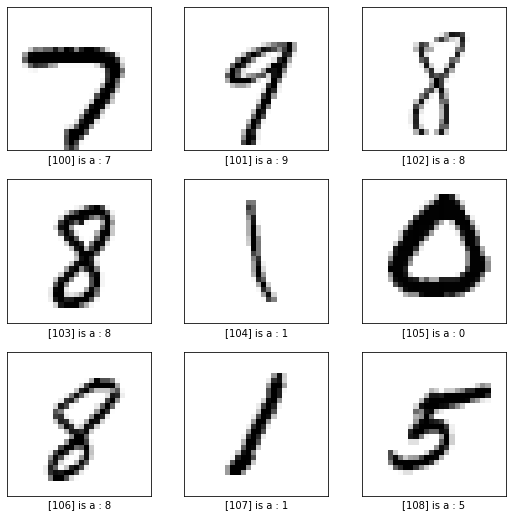

In [10]:
graphit(X_dev_images,Y_dev, 3,3,100,zoom=3)

## Create training data

In [11]:
data_train = data[1000:].T
Y_train = data_train[0] # labels
X_train = data_train[1:] # images
X_train = X_train / 255.

print(Y_train.shape,X_train.shape)

(41000,) (784, 41000)


## Building functions for neural network

### Activation functions

In [23]:
def ReLU(Z):
    np.maximum(0,Z)
    
def softmax(Z):
    return np.exp(Z) / np.sum(exp(Z))

### init the parameters

In [27]:
def init_params():
    W1 = np.random.rand(10,784)
    b1 = np.random.rand(10,1)
    W2 = np.random.rand(10,10)
    b2 = np.random.rand(10,1)
    return W1, b1, W2, b2

### Create the matrix of correct softmax classification

In [28]:
def one_hot(Y):
    one_hot_Y = np.zeros(Y.size)

### Forward Propagation

In [26]:
def forward_pop ( W1, b1, W2, b2 , X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(A1)
    return Z1, A1, Z2, A2

### Back Propagation

In [ ]:
def back_prop(Z1, A1, Z2, A2, Y):
    